In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
Univ = pd.read_excel(r"C:\Users\Bhaskar Kumbhar\ExcelR\Artificial Intelligence Course\Clustering\Universities.xlsx")

In [3]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
# Normalization function 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])

In [5]:
scaled_Univ_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [6]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [7]:
# for i in range(1,4):
#   print(i)


In [8]:
wcss1 = []

kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(scaled_Univ_df)
wcss1.append(kmeans.inertia_)


In [9]:
wcss1

[44.53176173145097]

In [10]:
kmeans.labels_

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [11]:
kmeans1 = KMeans(n_clusters=4,random_state=0)

kmeans1.fit(scaled_Univ_df)

wcss1.append(kmeans1.inertia_)

In [12]:
wcss1

[44.53176173145097, 33.654341806512235]

In [13]:
#kmeans.inertia_   ###sum of all squared distance between each data point and its centroid.

In [14]:
kmeans1.labels_

array([2, 3, 0, 2, 0, 2, 2, 0, 2, 3, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2])

In [15]:
scaled_Univ = pd.DataFrame(scaled_Univ_df)

In [16]:
scaled_Univ['Cluster_3'] = kmeans.labels_

In [17]:
scaled_Univ.head()

,0,1,2,3,4,5,Cluster_3
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303,2
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524,0
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634,2
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229,2
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587,2


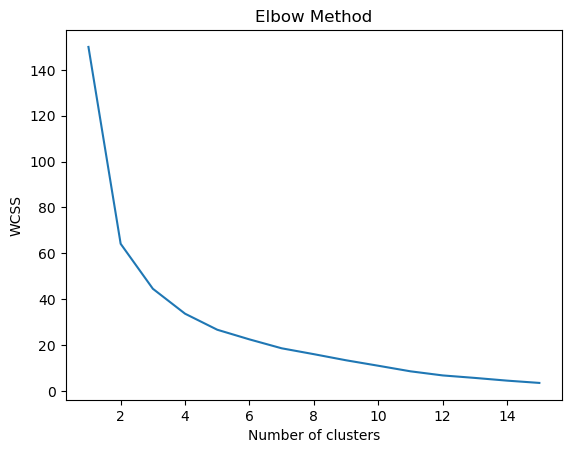

In [18]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i,random_state=145)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
wcss

[150.0,
 64.1452839501027,
 44.53176173145097,
 33.654341806512235,
 26.663475322662403,
 22.452524599848378,
 18.56891703085987,
 16.00657366889506,
 13.342119002093039,
 10.959526184170148,
 8.527513545246267,
 6.739894599461368,
 5.650551685513637,
 4.466377058620317,
 3.471502039723929]

In [20]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=4, random_state=42)

In [21]:
clusters_new.labels_

array([2, 3, 0, 2, 0, 2, 2, 0, 2, 3, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2])

In [22]:
#Assign clusters to the data set
Univ['clusterid_new'] = clusters_new.labels_

In [23]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,3


### Silhouette Score
* a = mean distance to all other points in its cluster
* b = mean distance to all other points in the next nearest cluster
* formula, SC = (b-a)/max(a,b)
* value lies b/w -1(worst) to 1(best)

In [24]:
from sklearn import metrics
metrics.silhouette_score(scaled_Univ_df, kmeans1.labels_)

0.3296877507696205

In [25]:
#pip install --upgrade --force-reinstall numpy scipy scikit-learn threadpoolctl
# I did the force installation, because I was getting errors while running the code for 'Elbow Method' graph.
#AttributeError: 'NoneType' object has no attribute 'split' 